# PokeWhom Project

## Imports

In [60]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import ast
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

## Read Data and Clean

<Axes: xlabel='type_primary'>

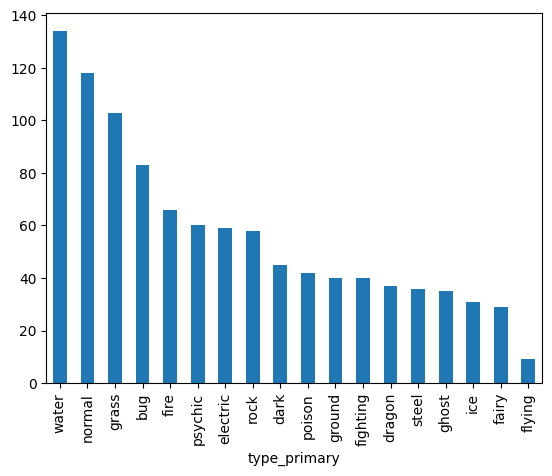

In [ ]:
# jupyter notebook
#source venv/bin/activate
#docker build -t my-jupyter .
#features = pokemon descriptions, height, weight, stats?
#labels = type

def clean_type(type):
    types = type.strip("{}").split(",")
    types = [t.strip().lower() for t in types]
    if len(types) == 1:
        return types[0]
    return f"{types[0]}-{types[1]}"

def type_primary(type):
    types = type.strip("{}").split(",")
    types = [t.strip().lower() for t in types] 
    return types[0]

def type_secondary(type):
    types = type.strip("{}").split(",")
    types = [t.strip().lower() for t in types] 
    if len(types) == 2:
        return types[1]
    return "None"

pokemon = pd.read_csv("../Data/pokedex.csv")
pokemon["type_clean"] = pokemon["type"].apply(clean_type)
pokemon["type_primary"] = pokemon["type"].apply(type_primary)
pokemon["type_secondary"] = pokemon["type"].apply(type_secondary)
pokemon["desc_clean"] = pokemon["info"].str.lower().str.replace(r"[^a-z\s]", "", regex=True)
pokemon.head(3)
pokemon["type_primary"].value_counts().plot(kind="bar")
#there's a disproportianate amount of water and normal types?

        



## Features

In [52]:
train_df, test_df = train_test_split(pokemon, test_size=0.2, random_state=4, stratify=pokemon["type_primary"])
vectorizer = CountVectorizer(ngram_range=(1, 2))
#features
features_train = vectorizer.fit_transform(train_df["desc_clean"])
features_test = vectorizer.transform(test_df["desc_clean"])
#labels

## Label Encoding

In [53]:
label_train = train_df["type_primary"]
label_test = test_df["type_primary"]

encoder = LabelEncoder()
encoder.fit(pokemon["type_primary"])

label_train_enc = encoder.transform(label_train)
label_test_enc = encoder.transform(label_test)


## Model

In [56]:
model = LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear")
model.fit(features_train, label_train_enc)
type_pred_enc = model.predict(features_test)
type_pred = encoder.inverse_transform(type_pred_enc)

## Evaulate

In [57]:
print(classification_report(label_test, type_pred))

              precision    recall  f1-score   support

         bug       0.15      0.19      0.17        16
        dark       0.00      0.00      0.00         9
      dragon       0.00      0.00      0.00         7
    electric       0.71      0.42      0.53        12
       fairy       0.00      0.00      0.00         6
    fighting       0.00      0.00      0.00         8
        fire       0.38      0.38      0.38        13
      flying       0.00      0.00      0.00         2
       ghost       0.25      0.14      0.18         7
       grass       0.22      0.33      0.26        21
      ground       0.00      0.00      0.00         8
         ice       0.50      0.33      0.40         6
      normal       0.30      0.46      0.36        24
      poison       0.00      0.00      0.00         8
     psychic       0.41      0.58      0.48        12
        rock       0.29      0.17      0.21        12
       steel       0.00      0.00      0.00         7
       water       0.34    

/home/db/NLP/PokeWhom/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/db/NLP/PokeWhom/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/db/NLP/PokeWhom/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
